In [1]:
from tensorflow import keras

from keras.applications import InceptionV3
from keras.layers import Dense,Flatten
from keras.models import Model
from glob import glob
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
import os
import matplotlib.pyplot as plt

In [3]:
##Image Size

image_size = [224,224]

train_path = "Datasets/Train/"
test_path =  "Datasets/Test/"

In [4]:
##Importing the Resnet50 Library

inception = InceptionV3(input_shape = image_size + [3],weights = "imagenet",include_top = False)

In [5]:
inception.trainable = False

In [6]:
folders = glob("Datasets/Train/*")
len(folders)

10

In [7]:
#Flattening the Layers

x = Flatten()(inception.output)

In [22]:
prediction = Dense(len(folders),activation = "softmax")(x)

#Creating the Model Object

model = Model(inputs = inception.input,outputs = prediction)

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [24]:
#Compiling the Model

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = "accuracy")

In [25]:
##Image Data Generator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

In [26]:
##Creating the training set

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 600 images belonging to 10 classes.


In [27]:
test_set = train_datagen.flow_from_directory(test_path,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 100 images belonging to 10 classes.


In [28]:
from keras.callbacks import EarlyStopping

In [29]:
##Fit the model

final = model.fit_generator(
    training_set,
    steps_per_epoch = len(training_set),
    epochs = 30,
    validation_data = test_set,
    validation_steps = len(test_set)
)

Epoch 1/30
19/19 [==============================] - 73s 4s/step - loss: 15.7910 - accuracy: 0.2450 - val_loss: 9.7312 - val_accuracy: 0.3300
Epoch 2/30
19/19 [==============================] - 69s 4s/step - loss: 5.2900 - accuracy: 0.4700 - val_loss: 2.0641 - val_accuracy: 0.6900
Epoch 3/30
19/19 [==============================] - 60s 3s/step - loss: 2.7116 - accuracy: 0.6017 - val_loss: 0.9782 - val_accuracy: 0.8100
Epoch 4/30
19/19 [==============================] - 63s 3s/step - loss: 1.3393 - accuracy: 0.7483 - val_loss: 0.8124 - val_accuracy: 0.8000
Epoch 5/30
19/19 [==============================] - 53s 3s/step - loss: 0.7170 - accuracy: 0.8200 - val_loss: 0.4775 - val_accuracy: 0.8800
Epoch 6/30
19/19 [==============================] - 48s 3s/step - loss: 0.7317 - accuracy: 0.8217 - val_loss: 0.4589 - val_accuracy: 0.9100
Epoch 7/30
19/19 [==============================] - 50s 3s/step - loss: 1.0186 - accuracy: 0.7967 - val_loss: 0.6599 - val_accuracy: 0.8600
Epoch 8/30
19/19 [=

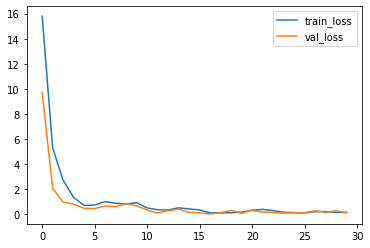

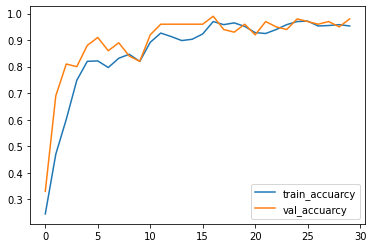

In [30]:
#Plot the Loss
plt.plot(final.history["loss"],label = "train_loss")
plt.plot(final.history["val_loss"],label = "val_loss")
plt.legend()
plt.show()

#Plot the Accuracy
plt.plot(final.history["accuracy"],label = "train_accuarcy")
plt.plot(final.history["val_accuracy"],label = "val_accuarcy")
plt.legend()
plt.show()

In [31]:
##Saving the Model

from keras.models import load_model

model.save("models/model_inceptionv3.h5")

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred[0]

array([1.7274531e-11, 3.3679923e-16, 1.2590047e-12, 1.0000000e+00,
       9.3766351e-21, 6.8020767e-09, 1.3784424e-21, 1.2768173e-13,
       5.8213802e-19, 2.6355397e-18], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred,axis = 1)

In [ ]:
y_pred

In [ ]:
from keras.preprocessing import image

In [ ]:
model = load_model("/content/drive/MyDrive/Car_Brand/models/model_inceptionv3.h5")

In [ ]:
#Test data

img = load_img("/content/drive/MyDrive/Car_Brand/Datasets/Test/lamborghini/lamborghini_1.jpeg",target_size = (224,224))

In [ ]:
img

In [ ]:
img_data = image.img_to_array(img)

In [ ]:
img_data.shape

In [ ]:
img_data = img_data/255
img_data = np.expand_dims(img_data,axis = 0)

In [ ]:
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
np.argmax(model.predict(img_data))